<center><font size="7"><b>Inference</b></font></center>

### This notebook was developed to perform inference of the trained model. The notebook has 3 main parts where in first section model is exported for further use. In second part inference is performed on images that were not used during training. All results are discussed in the last section.

## <b>1. Import modules required for this notebook</b>

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from shutil import rmtree
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

## <b>2. Get paths for directories that will be used further in the code</b>

In [3]:
cur_dir = os.getcwd()

In [4]:
main_dir = os.path.dirname(cur_dir)
figures_dir = os.path.join(main_dir, "figures")
scripts_dir = os.path.join(main_dir, "scripts")
work_dir = os.path.join(main_dir, "public/Birds")
models_dir = os.path.join(main_dir, "models")
inference_dir = os.path.join(main_dir, "inference")
labels_path = os.path.join(work_dir, "label_map.pbtxt")

## <b>3. Set a variable that will store a path to the chosen model</b>

In [5]:
model_path = os.path.join(models_dir, "faster_rcnn_resnet101_v1_640x640_coco17_tpu-8_20201204")

## <b>4. Export a model</b>

In [6]:
%cd $scripts_dir
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path $model_path/pipeline.config --trained_checkpoint_dir $model_path --output_directory $model_path/saved_model

/home/michal/MSc_lin/7144COMP/Coursework_2/scripts
2020-12-29 22:01:22.978464: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-29 22:01:24.351563: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-29 22:01:24.388016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-29 22:01:24.388476: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.86GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2020-12-29 22:01:24.388497: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-29 22:0

### Set a path to the exported model

In [7]:
saved_model_path = os.path.join(model_path, "saved_model", "saved_model")

## <b>5. Inference</b>

### <b>5.1 Load paths for inference images</b>

In [8]:
image_paths = []
for filename in os.listdir(inference_dir):
    if os.path.isfile(os.path.join(inference_dir, filename)):
        image_paths.append(os.path.join(inference_dir, filename))

### <b>5.2 Load exported model</b>

In [9]:
detect_fn = tf.saved_model.load(saved_model_path)

### <b>5.3 Load class labels</b>

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(labels_path, use_display_name=True)

### <b>5.4 Create directory structure for inference results</b>

In [11]:
inf_results = os.path.join(inference_dir, model_path.rsplit("/",1)[1])
if os.path.exists(inf_results):
    rmtree(inf_results)
os.mkdir(inf_results)

### <b>5.5 Perform inference</b>

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_957.jpg... Done


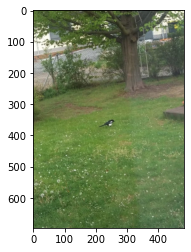

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_952.jpg... Done


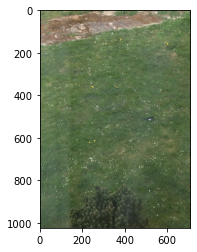

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_916.jpg... Done


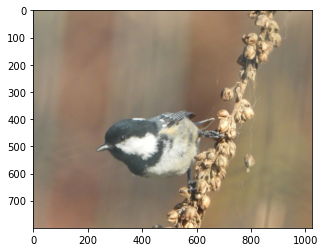

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_915.jpg... Done


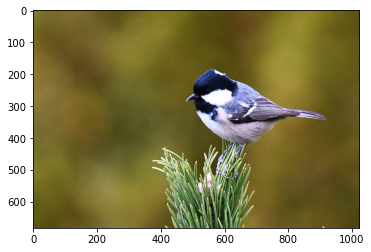

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0988.jpg... Done


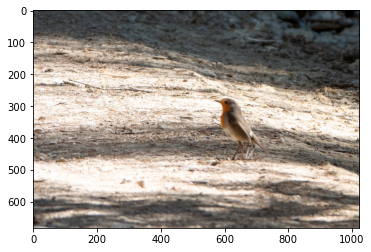

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_914.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0989.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_920.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_953.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_921.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_917.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0992.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0991.jpg... Done
Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_956.jpg... Done
Running inference for /home/michal/MSc_lin/7144

In [34]:
%matplotlib inline

# Loop through all inference images and perform detection
i = 0
for image_path in image_paths:
    print("Running inference for {}... ".format(image_path), end="")
    
    # Load image
    image_np = np.array(Image.open(image_path))
    
    # Convert image to input tensor
    input_tensor = tf.convert_to_tensor(image_np)
    #  Add axis as model expects a batch o images.
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform detection
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    # Draw bounding boxes 
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          line_thickness=4,
          min_score_thresh=.60,
          agnostic_mode=False)
    
    print('Done')
    
    # Save images to a results directory
    im = Image.fromarray(image_np_with_detections)
    im.save(os.path.join(inf_results, f"{image_path.rsplit('/', 1)[1]}"))
     
    # Show images in the notebook. Reduce number of images to show. Please find all images in the results directory
    if i < 5:
        plt.figure()
        plt.imshow(image_np_with_detections)
        plt.show()
        i += 1
print(f"\nInference results can be found in: {inf_results}")

## <b>6. Discussion</b>